In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_theme(style="ticks")
pd.set_option('display.max_columns',200)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
train_data = pd.read_csv('Dataset/fraudTrain.csv')
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
train_data.drop_duplicates(inplace = True)

In [5]:
train_data.shape

(1296675, 23)

### EDA

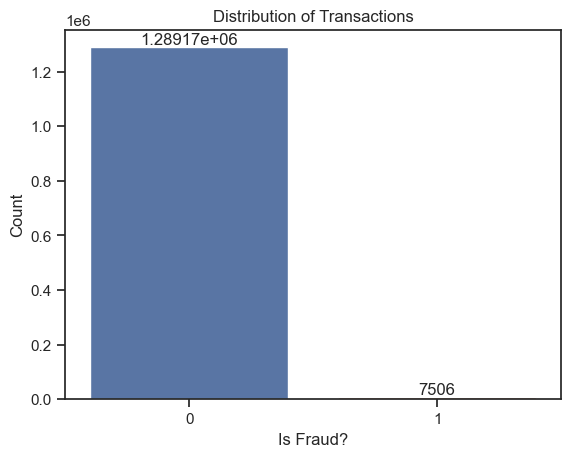

In [6]:
ax = sns.countplot(train_data,x='is_fraud')
plt.title('Distribution of Transactions')
ax.set_xlabel('Is Fraud?')
ax.set_ylabel("Count")

for container in ax.containers:
    ax.bar_label(container)

Text(0, 0.5, 'Amount')

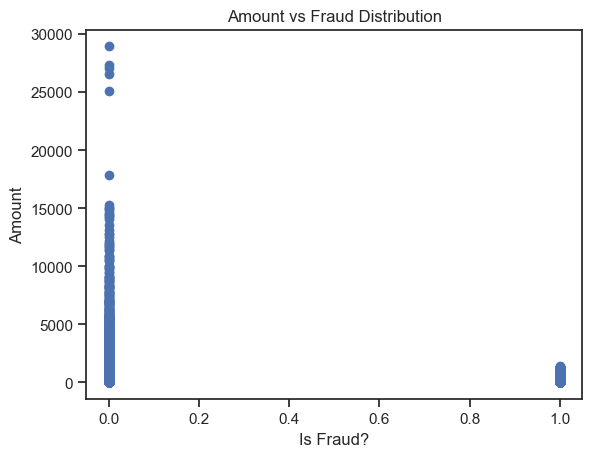

In [7]:
fig,ax = plt.subplots()
ax.scatter(train_data['is_fraud'], train_data['amt'])
plt.title('Amount vs Fraud Distribution')
ax.set_xlabel('Is Fraud?')
ax.set_ylabel('Amount')

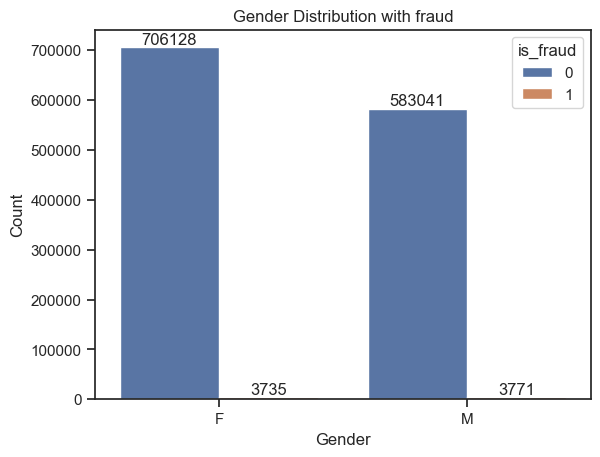

In [8]:
ax = sns.countplot(train_data,x='gender', hue = 'is_fraud')
plt.title('Gender Distribution with fraud')
ax.set_xlabel('Gender')
ax.set_ylabel("Count")
for container in ax.containers:
    ax.bar_label(container)

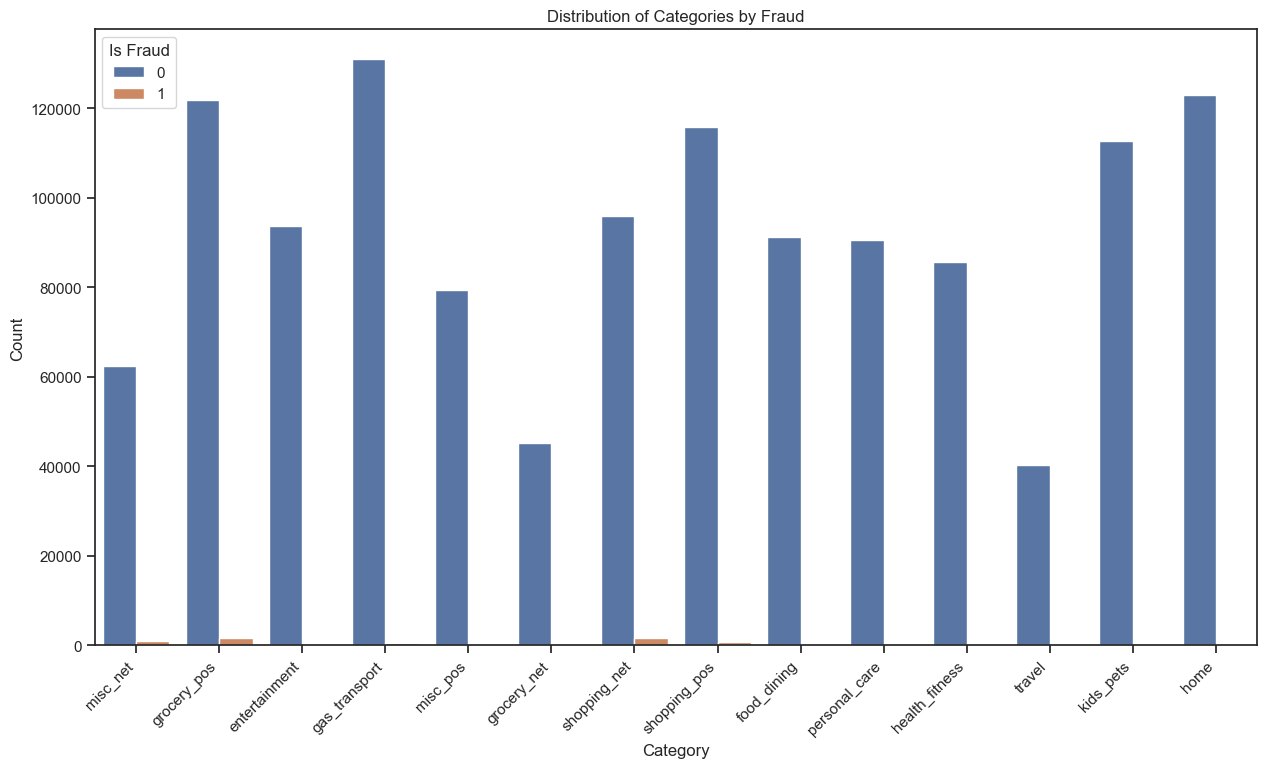

In [9]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(train_data,x='category', hue='is_fraud')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.title('Distribution of Categories by Fraud')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

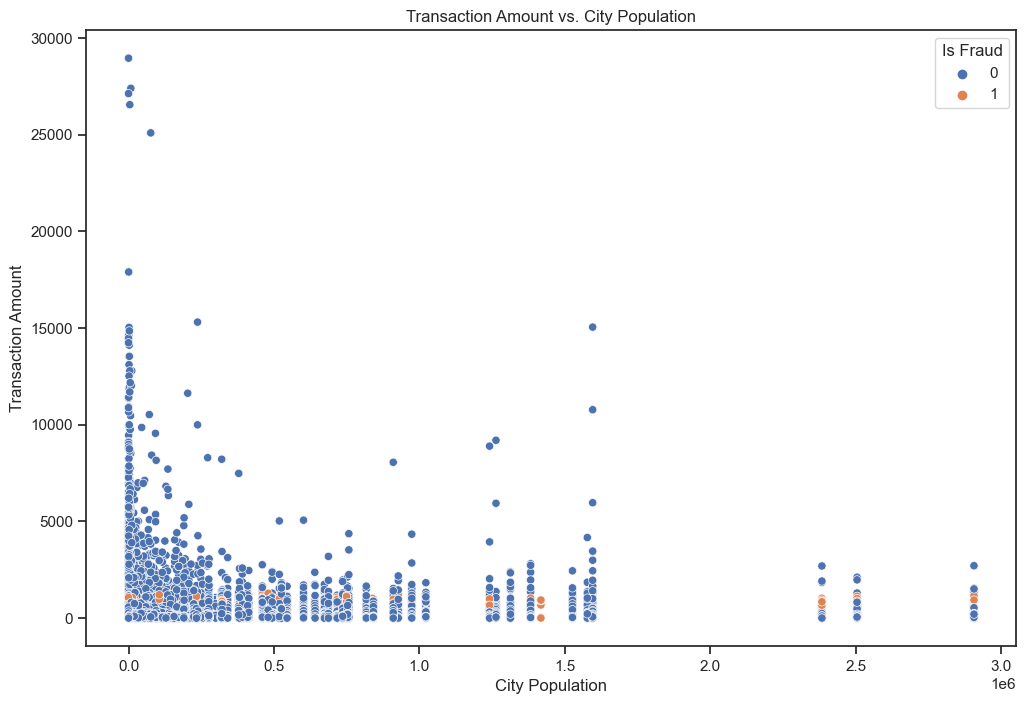

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(train_data, x='city_pop', y='amt', hue='is_fraud')
plt.title('Transaction Amount vs. City Population')
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraud')
plt.show()

In [11]:
columns = train_data.columns
columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
new_train_data = train_data[['gender','category','amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long','is_fraud']]
new_train_data.head()

,gender,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,F,misc_net,4.97,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,F,grocery_pos,107.23,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,M,entertainment,220.11,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,M,gas_transport,45.00,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,M,misc_pos,41.96,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


### Train - Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_train_data.drop(['is_fraud'], axis=1), new_train_data['is_fraud'],
                                                    test_size=0.2)

In [14]:
X_train.head()

,gender,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
150320,M,shopping_pos,2.68,42.8223,-83.2829,24840,1332409605,43.436594,-83.005981
1043681,M,grocery_pos,134.80,39.6967,-78.8031,626,1362797516,38.815912,-78.827018
341678,M,grocery_pos,126.77,37.2692,-82.9161,798,1339308737,37.112358,-83.391752
788789,M,food_dining,24.96,41.2064,-95.9953,518429,1354392361,41.996791,-95.772997
926765,F,home,5.28,37.2409,-82.7696,230,1357134419,36.741193,-83.046101


In [15]:
X_test.head()

,gender,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
643142,F,home,66.41,39.5803,-87.4616,205,1349015376,38.593635,-87.472758
267519,F,shopping_net,391.81,46.0062,-86.2555,6469,1336848537,45.239954,-85.578246
242958,F,shopping_pos,36.07,41.0935,-81.0425,2644,1335912142,42.056917,-81.480093
420860,F,grocery_pos,188.41,36.3011,-91.5281,4726,1341736278,36.587569,-91.093343
813524,M,travel,188.99,43.7450,-70.9092,1892,1354902234,44.062135,-71.087110


In [16]:
new_train_data['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

### Categorical

In [17]:
# One Hot Encoding
# To transforms categorical data into numerical
from sklearn.preprocessing import OneHotEncoder

categ_cols = ['gender','category']

ohe = OneHotEncoder()

# On Train Data
X_train_encoded = ohe.fit_transform(X_train[categ_cols]).toarray()

# On Test data
X_test_encoded = ohe.transform(X_test[categ_cols]).toarray()

In [18]:
X_train_encoded

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [19]:
ohe.categories_

[array(['F', 'M'], dtype=object),
 array(['entertainment', 'food_dining', 'gas_transport', 'grocery_net',
        'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
        'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
        'travel'], dtype=object)]

In [20]:
feature_labels = np.concatenate(ohe.categories_)

### Feature Scaling

In [21]:
# Proceed from Here
from sklearn.preprocessing import StandardScaler

numerical_cols = ['amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long']

scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
scaled_train_features = scaler.transform(X_train[numerical_cols])
scaled_test_features = scaler.transform(X_test[numerical_cols])

In [22]:
scaler.feature_names_in_

array(['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long'], dtype=object)

In [23]:
X_train_new = pd.concat([pd.DataFrame(X_train_encoded, columns=feature_labels),pd.DataFrame(scaled_train_features, columns=numerical_cols)],axis=1)
X_train_new.head()

,F,M,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.415165,0.844069,0.504863,-0.211660,-1.311565,0.958830,0.524555
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395406,0.228519,0.830462,-0.291825,1.055359,0.054871,0.828027
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.346141,-0.249548,0.531523,-0.291256,-0.774189,-0.278400,0.496541
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.278475,0.525837,-0.419093,1.422471,0.400679,0.677157,-0.402571
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.399214,-0.255121,0.542171,-0.293136,0.614258,-0.351012,0.521642


In [24]:
X_test_new = pd.concat([pd.DataFrame(X_test_encoded, columns=feature_labels),pd.DataFrame(scaled_test_features, columns=numerical_cols)],axis=1)
X_test_new.head()

,F,M,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.024174,0.205596,0.201149,-0.293219,-0.018136,0.011387,0.200183
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.972193,1.471100,0.288810,-0.272481,-0.965815,1.311627,0.337760
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.210314,0.503602,0.667699,-0.285144,-1.038751,0.688919,0.635363
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.724310,-0.440204,-0.094410,-0.278251,-0.585107,-0.381066,-0.062740
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.727868,1.025783,1.404203,-0.287634,0.440393,1.081206,1.390090


In [25]:
# Dropping columns to avoid multicollinearity

X_train_new.drop(['F','travel'],axis=1,inplace=True)
X_test_new.drop(['F','travel'],axis=1,inplace=True)

In [26]:
X_train_new.head()

,M,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.415165,0.844069,0.504863,-0.211660,-1.311565,0.958830,0.524555
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395406,0.228519,0.830462,-0.291825,1.055359,0.054871,0.828027
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.346141,-0.249548,0.531523,-0.291256,-0.774189,-0.278400,0.496541
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.278475,0.525837,-0.419093,1.422471,0.400679,0.677157,-0.402571
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.399214,-0.255121,0.542171,-0.293136,0.614258,-0.351012,0.521642


In [27]:
X_test_new.head()

,M,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.024174,0.205596,0.201149,-0.293219,-0.018136,0.011387,0.200183
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.972193,1.471100,0.288810,-0.272481,-0.965815,1.311627,0.337760
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.210314,0.503602,0.667699,-0.285144,-1.038751,0.688919,0.635363
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.724310,-0.440204,-0.094410,-0.278251,-0.585107,-0.381066,-0.062740
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727868,1.025783,1.404203,-0.287634,0.440393,1.081206,1.390090


### OverSampling Method (SMOTE)
##### To handle "Imblanced Dataset"

In [28]:
# Generating synthetic data to balance the imbalanced dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=36)

X_train_resample, y_train_resample = smote.fit_resample(X_train_new,y_train)

In [29]:
# checking newly created data
y_train_resample.shape

(2062634,)

### Model Selection

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
lc = LogisticRegression()
lc.fit(X_train_resample,y_train_resample)

C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy Score: 
 0.8841382767462934
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94    257852
           1       0.04      0.76      0.07      1483

    accuracy                           0.88    259335
   macro avg       0.52      0.82      0.50    259335
weighted avg       0.99      0.88      0.93    259335

Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


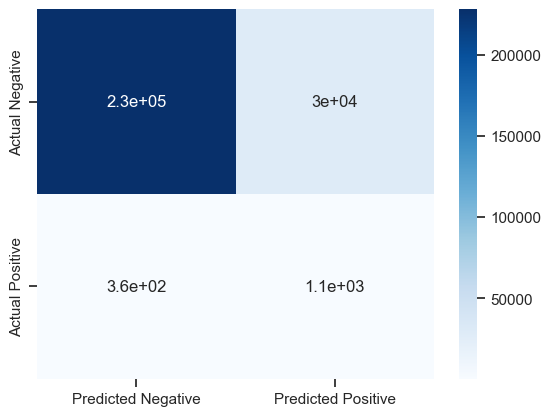

In [32]:
lc_pred = lc.predict(X_test_new)
print('Accuracy Score: \n', accuracy_score(y_test,lc_pred))
print('Classification Report: \n', classification_report(y_test,lc_pred))
print('Confusion Matrix: \n', sns.heatmap(confusion_matrix(y_test,lc_pred), annot = True, cmap='Blues',
                                       xticklabels=["Predicted Negative", "Predicted Positive"],
                                        yticklabels=["Actual Negative", "Actual Positive"],))

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train_resample,y_train_resample)

DecisionTreeClassifier()

Accuracy Score: 
 0.9934717643202807
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    257852
           1       0.46      0.77      0.58      1483

    accuracy                           0.99    259335
   macro avg       0.73      0.88      0.79    259335
weighted avg       1.00      0.99      0.99    259335

Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


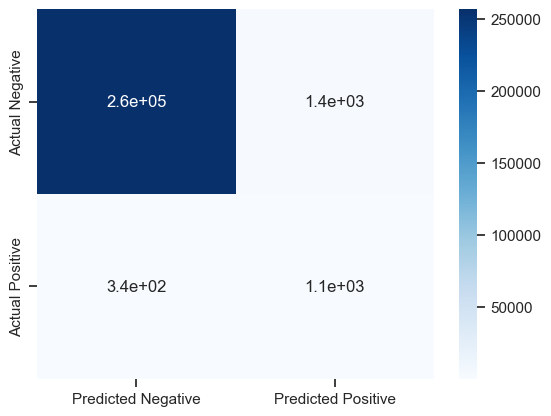

In [34]:
dt_pred = dt.predict(X_test_new)
print('Accuracy Score: \n', accuracy_score(y_test,dt_pred))
print('Classification Report: \n', classification_report(y_test,dt_pred))
print('Confusion Matrix: \n', sns.heatmap(confusion_matrix(y_test,dt_pred), annot = True, cmap='Blues',
                                       xticklabels=["Predicted Negative", "Predicted Positive"],
                                        yticklabels=["Actual Negative", "Actual Positive"],))

In [35]:
rf = RandomForestClassifier(max_samples=0.75, random_state=10,n_estimators=20)
rf.fit(X_train_resample,y_train_resample)

RandomForestClassifier(max_samples=0.75, n_estimators=20, random_state=10)

Accuracy Score: 
 0.9960128790946073
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257852
           1       0.61      0.81      0.70      1483

    accuracy                           1.00    259335
   macro avg       0.81      0.91      0.85    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix: 
 Axes(0.125,0.11;0.62x0.77)


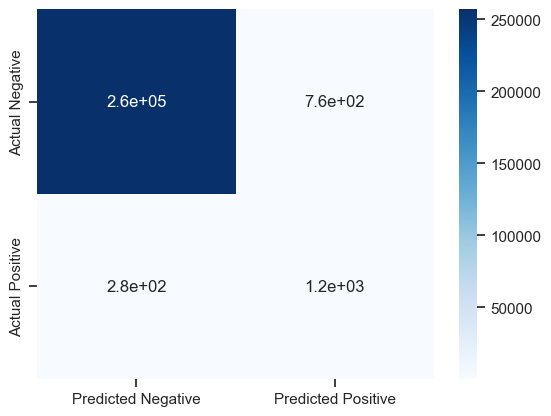

In [36]:
rf_pred = rf.predict(X_test_new)
print('Accuracy Score: \n', accuracy_score(y_test,rf_pred))
print('Classification Report: \n', classification_report(y_test,rf_pred))
print('Confusion Matrix: \n', sns.heatmap(confusion_matrix(y_test,rf_pred), annot = True, cmap='Blues',
                                       xticklabels=["Predicted Negative", "Predicted Positive"],
                                        yticklabels=["Actual Negative", "Actual Positive"],))

### Will go with Random Forest Classifier

In [37]:
# Saving model
import pickle
with open ('rf_model','wb') as file:
    pickle.dump(rf,file)